In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# 폰트
plt.rc('font', family = 'AppleGothic')

# 그래프를 이미지로 저장할 때
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'Bar_plot'

pdfsave = PdfPages(CHART_NAME + "_19011773.pdf")

In [16]:
def FileSave():
    global cnt
    cnt +=1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

# 일변량 막대 그래프

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
['b', 'g', 'r', 'c', 'm', 'y', 'k']
max : 350000
국가
미국      34.069888
스페인     13.272496
이탈리아    13.093680
독일      10.156670
프랑스      7.156500
중국       8.296820
영국       4.854332
이란       5.912403
스위스      2.142949
한국       1.044261
Name: 4월06일, dtype: float64
98481.1


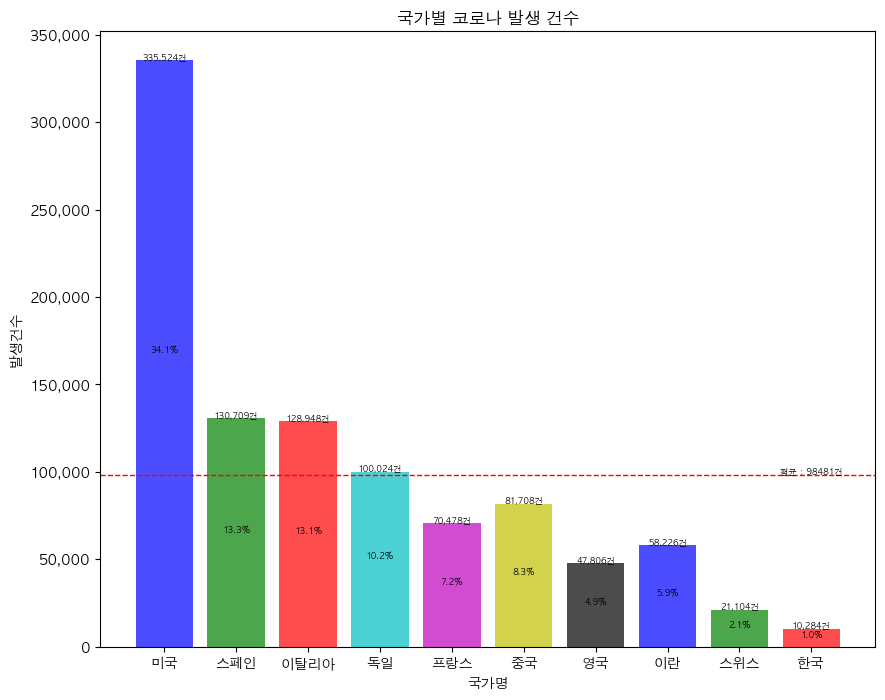

In [17]:
# data load
data1 = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
print(data1)
chart_data = data1['4월06일']


# 함수를 이용하여 chart 짜기
def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    fig1 = plt.figure(figsize = (10, 8))
    plt.bar(x, y, color = color, alpha = 0.7)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
        
    # yticks
    YTICKS_INTERVAL = 50000
    maxlim = int(y.max() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # max
    print('max :', maxlim)
    values = np.arange(0, maxlim+1, YTICKS_INTERVAL)
    plt.yticks(values, ['%s'%format(val, ',') for val in values])
    
    # 그래프 위에 건수와 비율 구하기
    ratio = 100 * y / y.sum() # 비율
    print(ratio)
    
    plt.rc('font', size = 6)
    for idx in range(y.size):
        value = format(y[idx], ',') + '건' # ex. 60건
        ratioval = '%.1f%%'%(ratio[idx]) # ex. 20.0%
        plt.text(x=idx, y=y[idx]+1, s=value, horizontalalignment = 'center') # 그래프 위에 '건수' 표시
        plt.text(x=idx, y=y[idx]/2, s=ratioval, horizontalalignment = 'center') # 그래프 중간에 '비율' 표시
        
    # 평균선을 수직선으로 그리기    
    meanval = y.mean()
    print(meanval)
    
    average = '평균 : %d건'%meanval
    plt.axhline(y=meanval, color = 'r', linewidth = 1, linestyle = 'dashed')
    plt.text(x = y.size -1, y=meanval+200, s=average, horizontalalignment='center')
    
    pdfsave.savefig(fig1)
    
    
    
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
bar_color = colors[0:len(chart_data)]
print(bar_color)


# draw
MakeBarChart01(x = chart_data.index, y = chart_data, color = bar_color, 
               xlabel = '국가명', ylabel='발생건수', title = '국가별 코로나 발생 건수')


# plt.show()
FileSave()

      gender  korean  english  math  computer  science
names                                                 
강감찬        M      85       77    80       100       96
이순신        M      86       90    82        93       93
신사임당       F      80       98    87        92       90
서현진        F      97       87    80        85       80
전지현        F     100      100    98       100       94
80
100
89
['b', 'g', 'r', 'c', 'm']
Bar_plot_02.png파일이 저장되었습니다.


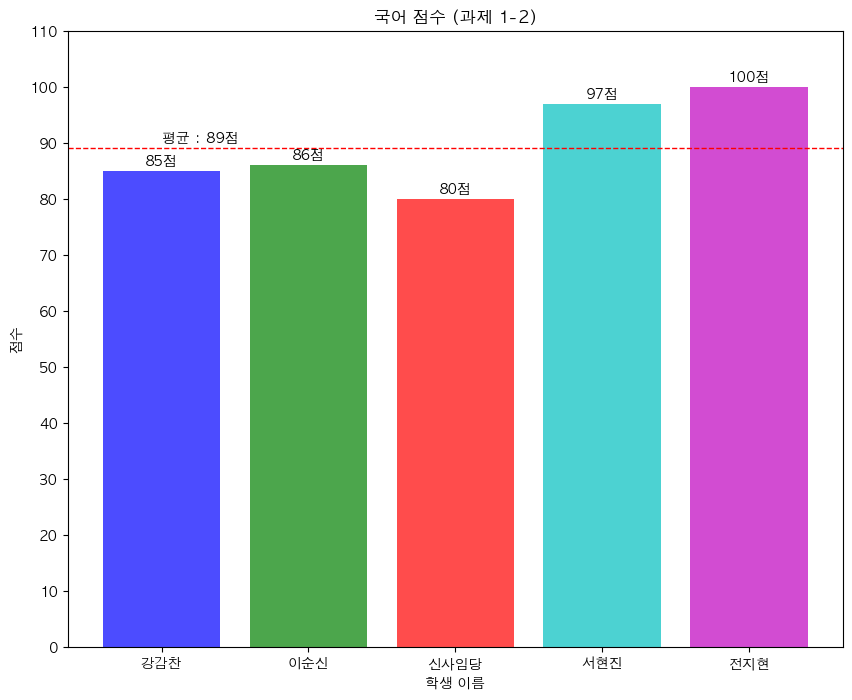

In [18]:
# data load
data2 = pd.read_csv('../data/final_exam.csv', encoding = 'CP949', index_col = 'names') # encoding error => encoding 추가
print(data2)

# chart data
x_data2 = data2.index
y_data2 = data2['korean']
print(y_data2.min())
print(y_data2.max())

# mean
mean = int(y_data2.mean())
print(mean)

# color
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
bar_color = colors[0:len(y_data2)]
print(bar_color)


# draw plot
## 1. 전반적인 그래프 그리기
plt.style.use('default')
plt.rc('font', family = 'AppleGothic')

fig2 = plt.figure(figsize = (10, 8))
plt.bar(x_data2, y_data2, color = bar_color, alpha = 0.7)
plt.xlabel('학생 이름')
plt.ylabel('점수')
plt.title('국어 점수 (과제 1-2)')


## 2. yticks
YTICKS_INTERVAL = 10 # 간격
maxlim = int(y_data2.max() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # 상한값
values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)
plt.yticks(values)


## 3. 세부사항 - 각각의 점수와 전체 평균
### 각각의 점수
for idx in range(y_data2.size):
    std_score = format(y_data2[idx])+'점' # 점수 입력
    plt.text(x = idx, y = y_data2[idx]+1, s = std_score, horizontalalignment = 'center')

### 전체 평균
mean_score = '평균 : %d점'%mean
plt.axhline(y = mean, color = 'r', linewidth = 1, linestyle = 'dashed')
plt.text(x = y_data2.size-5, y = mean+1, s = mean_score)


# plt.show()
FileSave()
pdfsave.savefig(fig2)

# 다변량 막대그래프

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589
일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608 

<Figure size 640x480 with 0 Axes>

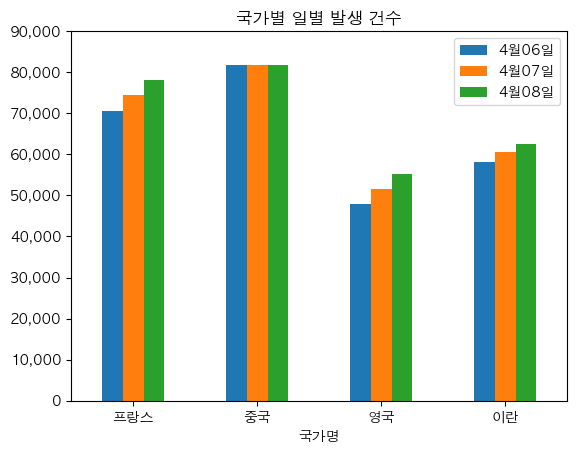

In [19]:
# data load
data1 = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
print(data1)
COUNTRY = ['프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일']
data1_ = data1.loc[COUNTRY, WHEN]
data1_.index.name = '국가명'
data1_.columns.name = '일자'
print(data1_)



# 다변량 막대그래프 그리는 함수
def MakeBarChart02(chartdata, rotation, title, ylim = None, stacked = False, yticks_interval = 10000):
    fig3 = plt.figure()
    # 범례에 제목을 넣기 위해서는 .plot()에서 legend 옵션을 사용해야 함
    # stacked = True :: 누적함수가 됨
    chartdata.plot(kind = 'bar', rot=rotation, title = title, legend=True, stacked = stacked)
    
    plt.legend(loc = 'best')
    
    print(chartdata)
    
    # 누적 막대 그래프 x
    if stacked == False:
        # max(chartdata.max()) : 항목 값 중에서 최대값을 의미
        maxlim = (int(max(chartdata.max())/yticks_interval)+1)*yticks_interval
        print('maxlim: ', maxlim)
        values = np.arange(0, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s' %format(val, ',') for val in values])
    else: # 누적 막대 그래프 O
        # 국가별 누적 합인 chartdata.sum(axis=1)의 최대값에 대한 연산이 이루어져야 함
        maxlim = (int(max(chartdata.sum(axis=1))/yticks_interval)+1) *yticks_interval
        print('maxlim: ', maxlim)
        values = np.arange(0, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s'%format(val, ',')for val in values])
    
    # y축의 상하한 값이 주어지는 경우에만 설정
    if ylim!=None:
        plt.ylim(ylim)
    
    pdfsave.savefig(fig3)
        
        

MakeBarChart02(chartdata = data1_, rotation = 0, title = '국가별 일별 발생 건수')

# plt.show()
FileSave()

# 전치 version

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589
국가명      프랑스     중국     영국     이란
일자                               
4월06일  70478  81708  47806  58226
4월07일  74390  81

<Figure size 640x480 with 0 Axes>

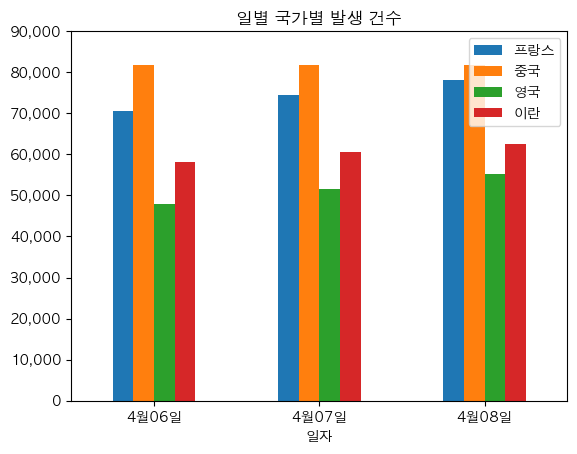

In [20]:
# data load
data1 = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
print(data1)
COUNTRY = ['프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일']
data1_ = data1.loc[COUNTRY, WHEN]
data1_.index.name = '국가명'
data1_.columns.name = '일자'
print(data1_)
# 데이터 전치
data1_T = data1_.T
print(data1_T)


# 다변량 막대그래프 그리는 함수
def MakeBarChart02(chartdata, rotation, title, ylim = None, stacked = False, yticks_interval = 10000):
    fig4 = plt.figure()
    # 범례에 제목을 넣기 위해서는 .plot()에서 legend 옵션을 사용해야 함
    # stacked = True :: 누적함수가 됨
    chartdata.plot(kind = 'bar', rot=rotation, title = title, legend=True, stacked = stacked)
    
    plt.legend(loc = 'best')
    
    print(chartdata)
    
    # 누적 막대 그래프 x
    if stacked == False:
        # max(chartdata.max()) : 항목 값 중에서 최대값을 의미
        maxlim = (int(max(chartdata.max())/yticks_interval)+1)*yticks_interval
        print('maxlim: ', maxlim)
        values = np.arange(0, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s' %format(val, ',') for val in values])
    else: # 누적 막대 그래프 O
        # 국가별 누적 합인 chartdata.sum(axis=1)의 최대값에 대한 연산이 이루어져야 함
        maxlim = (int(max(chartdata.sum(axis=1))/yticks_interval)+1) *yticks_interval
        print('maxlim: ', maxlim)
        values = np.arange(0, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s'%format(val, ',')for val in values])
    
    # y축의 상하한 값이 주어지는 경우에만 설정
    if ylim!=None:
        plt.ylim(ylim)
    
    pdfsave.savefig(fig4)


MakeBarChart02(chartdata =data1_T, rotation = 0, title = '일별 국가별 발생 건수')

# plt.show()
FileSave()

# 누적된 다변량 막대 그래프

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589
국가명
프랑스    223035
중국     245250
영국     154656
이란     181315
dtype: int64
255250
일자   4월06일  4월07일  4월08일
국가명          

<Figure size 640x480 with 0 Axes>

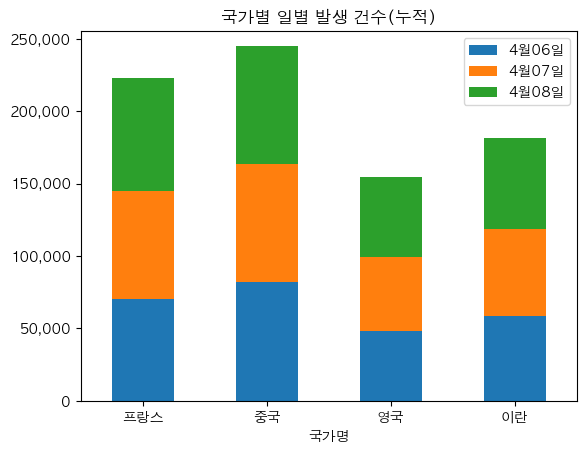

In [21]:
# data load
data1 = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
print(data1)
COUNTRY = ['프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일']
data1_ = data1.loc[COUNTRY, WHEN]
data1_.index.name = '국가명'
data1_.columns.name = '일자'
print(data1_)

ymax = data1_.sum(axis=1) # 각각 행별로 더함
ymaxlimit = ymax.max() + 10000 # 누적 막대 그래프를 그리기 위해
print(ymax)
print(ymaxlimit)



# 다변량 막대그래프 그리는 함수
def MakeBarChart02(chartdata, rotation, title, ylim = None, stacked = False, yticks_interval = 10000):
    fig5 = plt.figure()
    # 범례에 제목을 넣기 위해서는 .plot()에서 legend 옵션을 사용해야 함
    # stacked = True :: 누적함수가 됨
    chartdata.plot(kind = 'bar', rot=rotation, title = title, legend=True, stacked = stacked)
    
    plt.legend(loc = 'best')
    
    print(chartdata)
    
    # 누적 막대 그래프 x
    if stacked == False:
        # max(chartdata.max()) : 항목 값 중에서 최대값을 의미
        maxlim = (int(max(chartdata.max())/yticks_interval)+1)*yticks_interval
        print('maxlim: ', maxlim)
        values = np.arange(0, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s' %format(val, ',') for val in values])
    else: # 누적 막대 그래프 O
        # 국가별 누적 합인 chartdata.sum(axis=1)의 최대값에 대한 연산이 이루어져야 함
        maxlim = (int(max(chartdata.sum(axis=1))/yticks_interval)+1) *yticks_interval
        print('maxlim: ', maxlim)
        values = np.arange(0, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s'%format(val, ',')for val in values])
    
    # y축의 상하한 값이 주어지는 경우에만 설정
    if ylim!=None:
        plt.ylim(ylim)
        
    pdfsave.savefig(fig5)

        

MakeBarChart02(chartdata=data1_, rotation = 0, title = '국가별 일별 발생 건수(누적)',
              ylim = [0, ymaxlimit], stacked=True, yticks_interval = 50000)


# plt.show()
FileSave()

# 서브 plot을 가진 막대 그래프 2개

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
국가         미국
4월06일  335524
4월07일  364723
4월08일  387547
4월09일  424945
4월10일  461437
4월11일  495535
4월12일  524903
Bar_plot_06.png파일이 저장되었습니다.


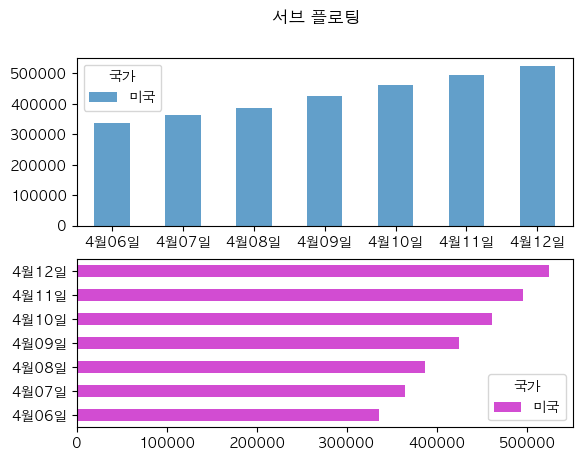

In [22]:
# data load
data1 = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
print(data1)
# only_usa = [item for item in data1.index if item in ['미국']]
# print(only_usa)
only_usa_T = data1.loc[['미국']].T
print(only_usa_T)


# subplot barchart에 대한 함수
def MakeBarChart04(chartdata, suptitle):
    fig6, axes = plt.subplots(nrows =2, ncols = 1) # 2행 1열
    
    chartdata.plot(kind='bar', ax=axes[0], rot = 0, alpha = 0.7)
    
    chartdata.plot(kind = 'barh', ax = axes[1], color = 'm', alpha = 0.7)
    
    fig6.suptitle(suptitle)
    
    pdfsave.savefig(fig6)
    
    
MakeBarChart04(chartdata=only_usa_T, suptitle = '서브 플로팅')

# plt.show()
FileSave()

In [23]:
## makebarchart02 안됨!!!!!!!!!
# from matplotlib.backends.backend_pdf import PdfPages

# pdfsave = PdfPages(CHART_NAME + "_19011773.pdf")
# pdfsave.savefig(fig1)
# pdfsave.savefig(fig2)
# pdfsave.savefig(fig3)
# pdfsave.savefig(fig4)
# pdfsave.savefig(fig5)
# pdfsave.savefig(fig6)
pdfsave.close()